In [14]:
import pandas as pd
import numpy as np
import requests
import pprint
from matplotlib import pyplot as plt
import seaborn as sns

In [15]:
#Endpoint TSE com resultados atualizados - 10s:
url='https://resultados.tse.jus.br/oficial/ele2022/544/dados-simplificados/br/br-c0001-e000544-r.json'

#Fazendo a requisição na URL:
re=requests.get(url).json()
candidatos = re['cand'][0:10]

In [16]:
df=pd.DataFrame(candidatos)
df=df[['nm','n','dvt','vap','pvap']]
df.rename(columns={'nm':'Nome do Candidato',
                'n':'Numero do Candidato',
                'dvt':'Validade',
                'vap':'Votos',
                'pvap':'(%) Votos'}, inplace=True)

df['Horario Atualização']=re['hg']
df['(%) Votos']=df['(%) Votos'].str.replace(',','.')
df['(%) Votos']=df['(%) Votos'].astype(float)
df['Votos']=df['Votos'].astype(int)
df['Nome do Candidato']=df['Nome do Candidato'].str.replace('D&apos;',"D'")
df=df.sort_values(by='Votos', ascending=False)

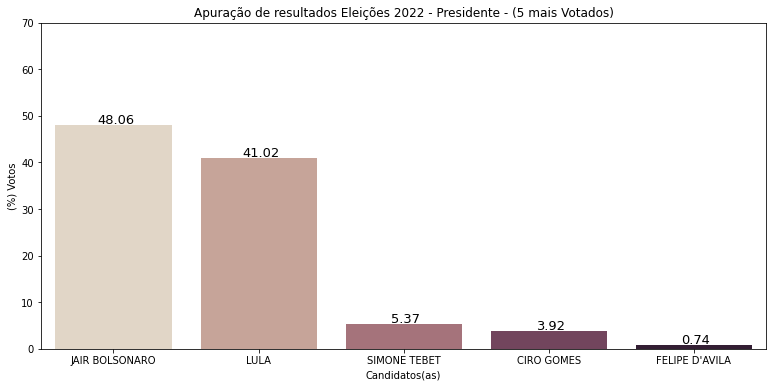

In [19]:
fig, axs = plt.subplots(ncols=1, figsize=(13,6))

ax1 = sns.barplot(
    x="Nome do Candidato",
    y='(%) Votos',
    data=df[:5],
    palette="ch:.25",
    ax=axs)

ax1.set(xlabel="Candidatos(as)",
        ylabel="(%) Votos",
        title="Apuração de resultados Eleições 2022 - Presidente - (5 mais Votados)",
        ylim=(0,70))


# Adicionando rotulo com valores no gráfico ax1:
for p in ax1.patches:
            ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=13, color='black', xytext=(2, 5),
                textcoords='offset points')

plt.show()


In [21]:
df

,Nome do Candidato,Numero do Candidato,Validade,Votos,(%) Votos,Horario Atualização
0,JAIR BOLSONARO,22,Válido,314639,48.06,17:26:28
1,LULA,13,Válido,268559,41.02,17:26:28
2,SIMONE TEBET,15,Válido,35148,5.37,17:26:28
3,CIRO GOMES,12,Válido,25639,3.92,17:26:28
4,FELIPE D'AVILA,30,Válido,4862,0.74,17:26:28
5,SORAYA THRONICKE,44,Válido,3391,0.52,17:26:28
6,PADRE KELMON,14,Válido,663,0.10,17:26:28
7,SOFIA MANZANO,21,Válido,607,0.09,17:26:28
8,LÉO PÉRICLES,80,Válido,452,0.07,17:26:28
9,VERA,16,Válido,436,0.07,17:26:28
